In [1]:
import post

Namespace(batchSize=None, dense=[240, 150, 24], dropout=0.1, epochs=5000, exp='bsp', filters=[15, 11, 11, 11, 20, 18, 18, 18, 25, 22, 22, 22, 30, 28, 28, 30, 40, 50], kernel_sizes=[5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 5, 5], l2=0.0001, min_delta=0.0, nclasses=6, patience=200, pklDir='/ourdisk/hpc/symbiotic/auto_archive_notyet/tape_2copies/datasets/group/sippc3/kinematics', pool_sizes=[1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1], pool_strides=[1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1], reduce=4, resultsPath='results', sDropout=0.1, stepsPerEpoch=None, trainCSV='MasteryOfPropulsionTrain.csv', trainCSVDir='.', validCSV='MasteryOfPropulsionValid.csv', validCSVDir='.')


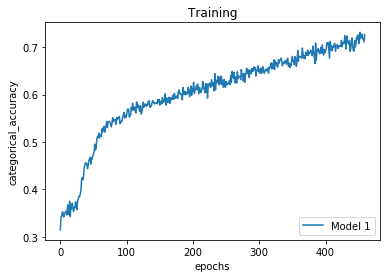

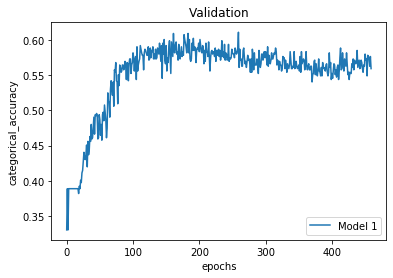

Average Val Accuracy:  0.6044904887676239


In [3]:
post.visualizeExperiment('results', 'bsp*240_150_24*drop_0.10*.pkl')

Namespace(batchSize=None, dense=[100, 20], dropout=0, epochs=2, exp='deleteRot', filters=[60, 80], foldsPath='folds', kernel_sizes=[20, 10], l2=0, min_delta=0.0, nclasses=6, patience=100, pklDir='', pool_sizes=[5, 1], pool_strides=[5, 1], reduce=1, resultsPath='results', rot=0, sDropout=0, stepsPerEpoch=None)
Rotation:  0
Accuracy:  0.4074999988079071


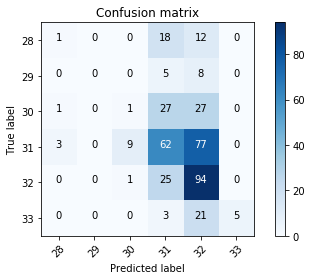

Accuracy:  0.4395886957645416


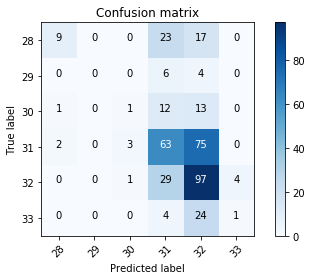

Namespace(batchSize=None, dense=[100, 20], dropout=0, epochs=2, exp='deleteRot', filters=[60, 80], foldsPath='folds', kernel_sizes=[20, 10], l2=0, min_delta=0.0, nclasses=6, patience=100, pklDir='', pool_sizes=[5, 1], pool_strides=[5, 1], reduce=1, resultsPath='results', rot=1, sDropout=0, stepsPerEpoch=None)
Rotation:  1
Accuracy:  0.4730077087879181


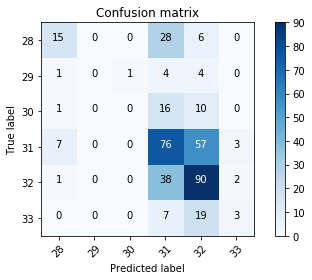

Accuracy:  0.39500001072883606


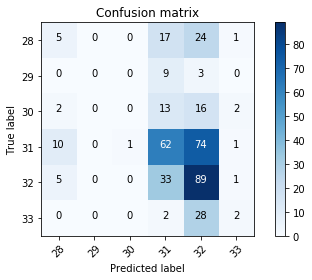

Namespace(batchSize=None, dense=[48, 48, 24], dropout=0.1, epochs=5000, exp='trot1', filters=[15, 11, 11, 11, 20, 18, 18, 18, 25, 22, 22, 22, 30, 28, 28, 30, 40, 50], kernel_sizes=[5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 5, 5], l2=0.0001, min_delta=0.0, nclasses=6, patience=200, pklDir='/ourdisk/hpc/symbiotic/auto_archive_notyet/tape_2copies/datasets/group/sippc3/kinematics', pool_sizes=[1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1], pool_strides=[1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1], reduce=4, resultsPath='results', sDropout=0.1, stepsPerEpoch=None, testCSV='test.csv', testCSVDir='rotations', trainCSV='rot1.csv', trainCSVDir='rotations', validCSV='valid.csv', validCSVDir='rotations')
Accuracy:  0.4444444477558136


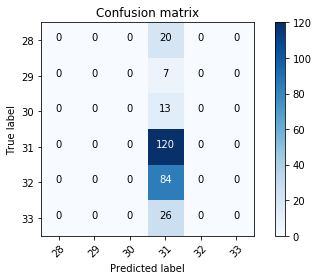

Accuracy:  0.4075630307197571


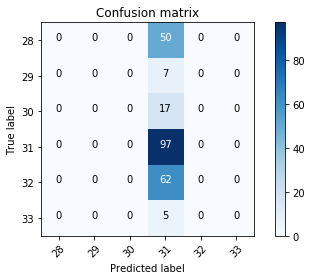

Namespace(batchSize=None, dense=[60, 48, 24], dropout=0.1, epochs=5000, exp='trot1', filters=[15, 11, 11, 11, 20, 18, 18, 18, 25, 22, 22, 22, 30, 28, 28, 35, 45, 60], kernel_sizes=[5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 5, 5], l2=0.0001, min_delta=0.0, nclasses=6, patience=200, pklDir='/ourdisk/hpc/symbiotic/auto_archive_notyet/tape_2copies/datasets/group/sippc3/kinematics', pool_sizes=[1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1], pool_strides=[1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1], reduce=4, resultsPath='results', sDropout=0.1, stepsPerEpoch=None, testCSV='test.csv', testCSVDir='rotations', trainCSV='rot1.csv', trainCSVDir='rotations', validCSV='valid.csv', validCSVDir='rotations')
Accuracy:  0.4444444477558136


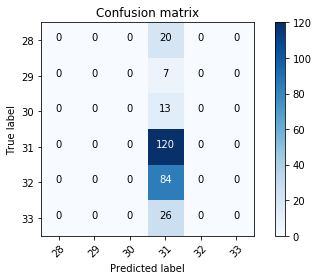

Accuracy:  0.4075630307197571


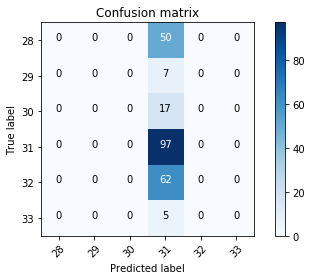

Namespace(batchSize=None, dense=[90, 60, 24], dropout=0.1, epochs=5000, exp='trot1', filters=[15, 11, 11, 11, 20, 18, 18, 18, 25, 22, 22, 22, 30, 28, 28, 35, 50, 100], kernel_sizes=[5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 5, 5], l2=0.0001, min_delta=0.0, nclasses=6, patience=200, pklDir='/ourdisk/hpc/symbiotic/auto_archive_notyet/tape_2copies/datasets/group/sippc3/kinematics', pool_sizes=[1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1], pool_strides=[1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1], reduce=4, resultsPath='results', sDropout=0.1, stepsPerEpoch=None, testCSV='test.csv', testCSVDir='rotations', trainCSV='rot1.csv', trainCSVDir='rotations', validCSV='valid.csv', validCSVDir='rotations')
Accuracy:  0.4444444477558136


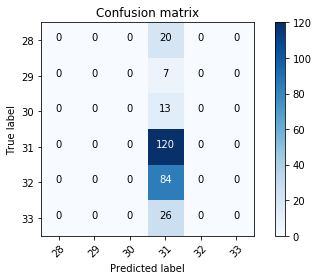

Accuracy:  0.4075630307197571


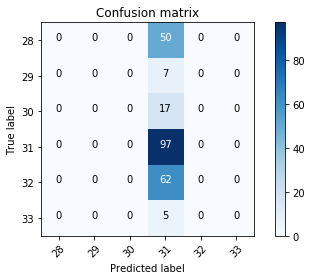

Namespace(batchSize=None, dense=[240, 120, 24], dropout=0.1, epochs=5000, exp='trot1', filters=[15, 11, 11, 11, 20, 18, 18, 18, 25, 22, 22, 22, 30, 28, 28, 35, 50, 60], kernel_sizes=[5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 5, 5], l2=0.0001, min_delta=0.0, nclasses=6, patience=200, pklDir='/ourdisk/hpc/symbiotic/auto_archive_notyet/tape_2copies/datasets/group/sippc3/kinematics', pool_sizes=[1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1], pool_strides=[1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1], reduce=4, resultsPath='results', sDropout=0.1, stepsPerEpoch=None, testCSV='test.csv', testCSVDir='rotations', trainCSV='rot1.csv', trainCSVDir='rotations', validCSV='valid.csv', validCSVDir='rotations')
Accuracy:  0.4444444477558136


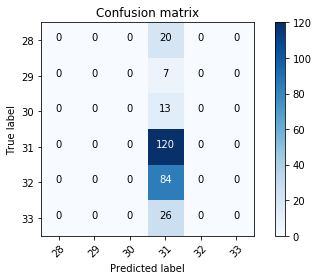

Accuracy:  0.4075630307197571


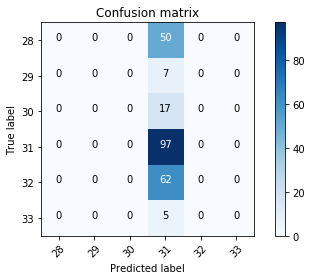

Namespace(batchSize=None, dense=[240, 120, 24], dropout=0.1, epochs=5000, exp='trot1', filters=[15, 11, 11, 11, 20, 18, 18, 18, 25, 22, 22, 22, 30, 28, 28, 35, 50, 90], kernel_sizes=[5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 5, 5], l2=0.0001, min_delta=0.0, nclasses=6, patience=200, pklDir='/ourdisk/hpc/symbiotic/auto_archive_notyet/tape_2copies/datasets/group/sippc3/kinematics', pool_sizes=[1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1], pool_strides=[1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1], reduce=4, resultsPath='results', sDropout=0.1, stepsPerEpoch=None, testCSV='test.csv', testCSVDir='rotations', trainCSV='rot1.csv', trainCSVDir='rotations', validCSV='valid.csv', validCSVDir='rotations')
Accuracy:  0.4444444477558136


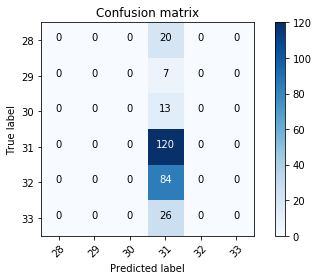

Accuracy:  0.4075630307197571


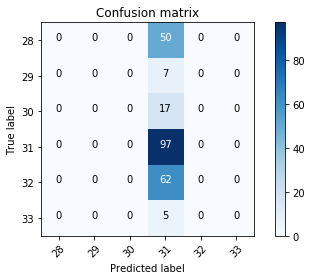

Namespace(batchSize=None, dense=[90, 60, 24], dropout=0.1, epochs=5000, exp='trot1', filters=[15, 11, 11, 11, 20, 18, 18, 18, 25, 22, 22, 22, 30, 28, 28, 35, 50, 90], kernel_sizes=[5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 5, 5], l2=0.0001, min_delta=0.0, nclasses=6, patience=200, pklDir='/ourdisk/hpc/symbiotic/auto_archive_notyet/tape_2copies/datasets/group/sippc3/kinematics', pool_sizes=[1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1], pool_strides=[1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1], reduce=4, resultsPath='results', sDropout=0.1, stepsPerEpoch=None, testCSV='test.csv', testCSVDir='rotations', trainCSV='rot1.csv', trainCSVDir='rotations', validCSV='valid.csv', validCSVDir='rotations')
Accuracy:  0.6629629731178284


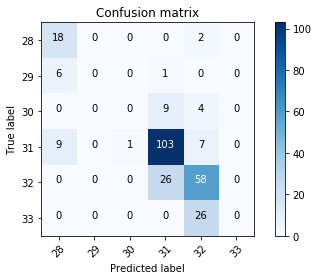

Accuracy:  0.5588235259056091


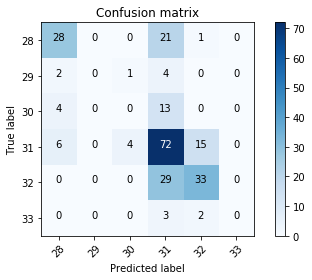

Namespace(batchSize=None, dense=[96, 48, 24], dropout=0.1, epochs=5000, exp='trot1', filters=[15, 11, 11, 11, 20, 18, 18, 18, 25, 22, 22, 22, 30, 28, 28, 40, 60, 100], kernel_sizes=[5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 5, 5], l2=0.0001, min_delta=0.0, nclasses=6, patience=200, pklDir='/ourdisk/hpc/symbiotic/auto_archive_notyet/tape_2copies/datasets/group/sippc3/kinematics', pool_sizes=[1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1], pool_strides=[1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1], reduce=4, resultsPath='results', sDropout=0.1, stepsPerEpoch=None, testCSV='test.csv', testCSVDir='rotations', trainCSV='rot1.csv', trainCSVDir='rotations', validCSV='valid.csv', validCSVDir='rotations')
Accuracy:  0.4444444477558136


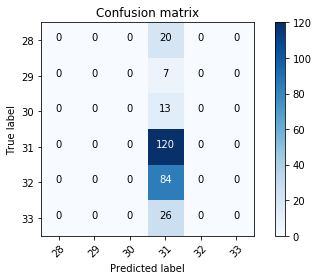

Accuracy:  0.4075630307197571


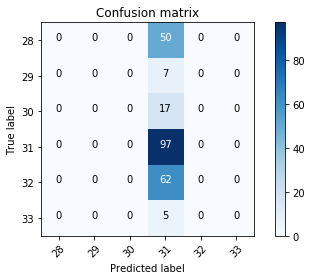

Namespace(batchSize=None, dense=[48, 48, 24], dropout=0.1, epochs=5000, exp='trot2', filters=[15, 11, 11, 11, 20, 18, 18, 18, 25, 22, 22, 22, 30, 28, 28, 30, 40, 50], kernel_sizes=[5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 5, 5], l2=0.0001, min_delta=0.0, nclasses=6, patience=200, pklDir='/ourdisk/hpc/symbiotic/auto_archive_notyet/tape_2copies/datasets/group/sippc3/kinematics', pool_sizes=[1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1], pool_strides=[1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1], reduce=4, resultsPath='results', sDropout=0.1, stepsPerEpoch=None, testCSV='test.csv', testCSVDir='rotations', trainCSV='rot2.csv', trainCSVDir='rotations', validCSV='valid.csv', validCSVDir='rotations')
Accuracy:  0.5740740895271301


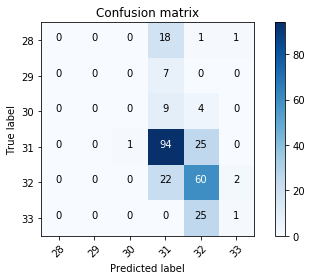

Accuracy:  0.45798319578170776


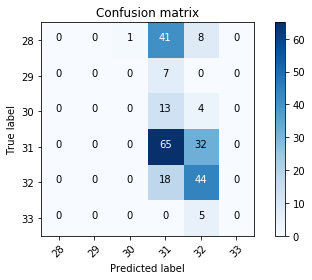

Namespace(batchSize=None, dense=[60, 48, 24], dropout=0.1, epochs=5000, exp='trot2', filters=[15, 11, 11, 11, 20, 18, 18, 18, 25, 22, 22, 22, 30, 28, 28, 35, 45, 60], kernel_sizes=[5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 5, 5], l2=0.0001, min_delta=0.0, nclasses=6, patience=200, pklDir='/ourdisk/hpc/symbiotic/auto_archive_notyet/tape_2copies/datasets/group/sippc3/kinematics', pool_sizes=[1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1], pool_strides=[1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1], reduce=4, resultsPath='results', sDropout=0.1, stepsPerEpoch=None, testCSV='test.csv', testCSVDir='rotations', trainCSV='rot2.csv', trainCSVDir='rotations', validCSV='valid.csv', validCSVDir='rotations')
Accuracy:  0.5888888835906982


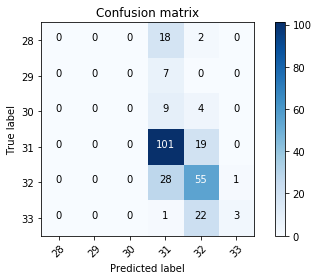

Accuracy:  0.45378151535987854


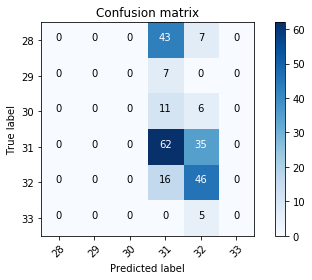

Namespace(batchSize=None, dense=[240, 120, 24], dropout=0.1, epochs=5000, exp='trot2', filters=[15, 11, 11, 11, 20, 18, 18, 18, 25, 22, 22, 22, 30, 28, 28, 35, 50, 90], kernel_sizes=[5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 5, 5], l2=0.0001, min_delta=0.0, nclasses=6, patience=200, pklDir='/ourdisk/hpc/symbiotic/auto_archive_notyet/tape_2copies/datasets/group/sippc3/kinematics', pool_sizes=[1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1], pool_strides=[1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1], reduce=4, resultsPath='results', sDropout=0.1, stepsPerEpoch=None, testCSV='test.csv', testCSVDir='rotations', trainCSV='rot2.csv', trainCSVDir='rotations', validCSV='valid.csv', validCSVDir='rotations')
Accuracy:  0.5666666626930237


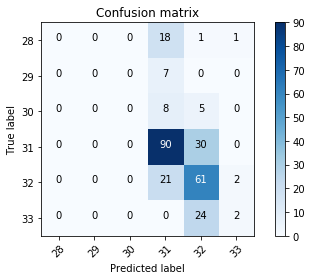

Accuracy:  0.45798319578170776


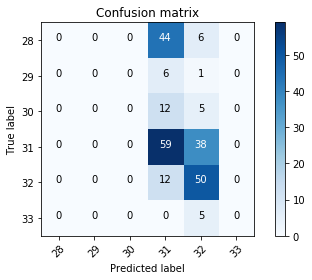

Namespace(batchSize=None, dense=[90, 60, 24], dropout=0.1, epochs=5000, exp='trot2', filters=[15, 11, 11, 11, 20, 18, 18, 18, 25, 22, 22, 22, 30, 28, 28, 35, 50, 90], kernel_sizes=[5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 5, 5], l2=0.0001, min_delta=0.0, nclasses=6, patience=200, pklDir='/ourdisk/hpc/symbiotic/auto_archive_notyet/tape_2copies/datasets/group/sippc3/kinematics', pool_sizes=[1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1], pool_strides=[1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1], reduce=4, resultsPath='results', sDropout=0.1, stepsPerEpoch=None, testCSV='test.csv', testCSVDir='rotations', trainCSV='rot2.csv', trainCSVDir='rotations', validCSV='valid.csv', validCSVDir='rotations')
Accuracy:  0.5666666626930237


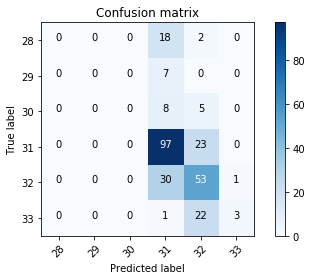

Accuracy:  0.4831932783126831


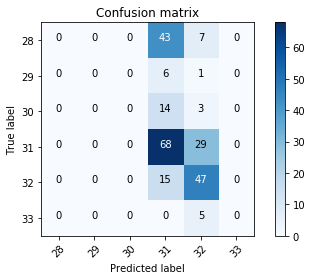

Namespace(batchSize=None, dense=[48, 48, 24], dropout=0.1, epochs=5000, exp='trot3', filters=[15, 11, 11, 11, 20, 18, 18, 18, 25, 22, 22, 22, 30, 28, 28, 30, 40, 50], kernel_sizes=[5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 5, 5], l2=0.0001, min_delta=0.0, nclasses=6, patience=200, pklDir='/ourdisk/hpc/symbiotic/auto_archive_notyet/tape_2copies/datasets/group/sippc3/kinematics', pool_sizes=[1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1], pool_strides=[1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1], reduce=4, resultsPath='results', sDropout=0.1, stepsPerEpoch=None, testCSV='test.csv', testCSVDir='rotations', trainCSV='rot3.csv', trainCSVDir='rotations', validCSV='valid.csv', validCSVDir='rotations')
Accuracy:  0.6407407522201538


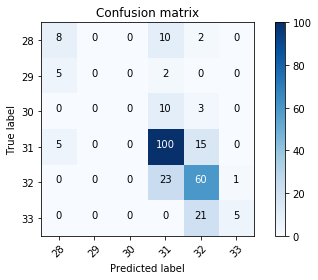

Accuracy:  0.5084033608436584


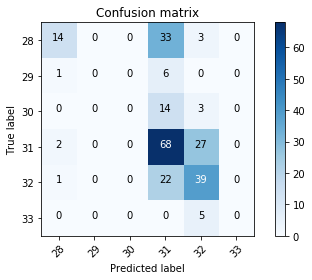

Namespace(batchSize=None, dense=[60, 48, 24], dropout=0.1, epochs=5000, exp='trot3', filters=[15, 11, 11, 11, 20, 18, 18, 18, 25, 22, 22, 22, 30, 28, 28, 35, 45, 60], kernel_sizes=[5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 5, 5], l2=0.0001, min_delta=0.0, nclasses=6, patience=200, pklDir='/ourdisk/hpc/symbiotic/auto_archive_notyet/tape_2copies/datasets/group/sippc3/kinematics', pool_sizes=[1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1], pool_strides=[1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1], reduce=4, resultsPath='results', sDropout=0.1, stepsPerEpoch=None, testCSV='test.csv', testCSVDir='rotations', trainCSV='rot3.csv', trainCSVDir='rotations', validCSV='valid.csv', validCSVDir='rotations')
Accuracy:  0.6222222447395325


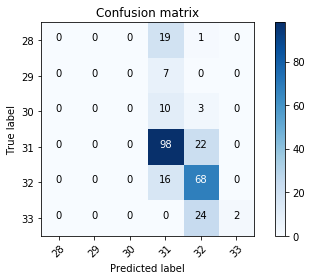

Accuracy:  0.4285714328289032


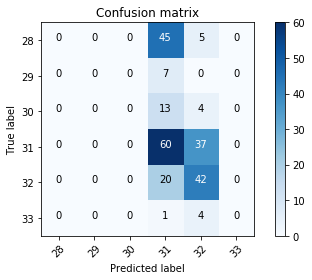

Namespace(batchSize=None, dense=[240, 120, 24], dropout=0.1, epochs=5000, exp='trot3', filters=[15, 11, 11, 11, 20, 18, 18, 18, 25, 22, 22, 22, 30, 28, 28, 35, 50, 90], kernel_sizes=[5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 5, 5], l2=0.0001, min_delta=0.0, nclasses=6, patience=200, pklDir='/ourdisk/hpc/symbiotic/auto_archive_notyet/tape_2copies/datasets/group/sippc3/kinematics', pool_sizes=[1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1], pool_strides=[1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1], reduce=4, resultsPath='results', sDropout=0.1, stepsPerEpoch=None, testCSV='test.csv', testCSVDir='rotations', trainCSV='rot3.csv', trainCSVDir='rotations', validCSV='valid.csv', validCSVDir='rotations')
Accuracy:  0.4703703820705414


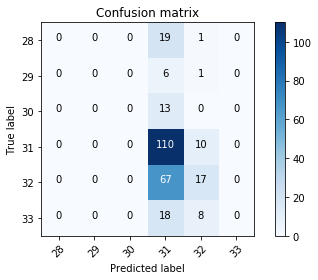

Accuracy:  0.36974790692329407


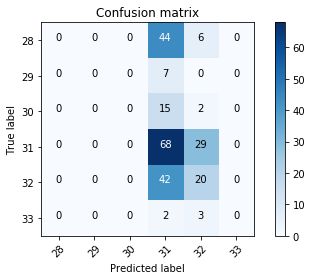

Namespace(batchSize=None, dense=[90, 60, 24], dropout=0.1, epochs=5000, exp='trot3', filters=[15, 11, 11, 11, 20, 18, 18, 18, 25, 22, 22, 22, 30, 28, 28, 35, 50, 90], kernel_sizes=[5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 5, 5], l2=0.0001, min_delta=0.0, nclasses=6, patience=200, pklDir='/ourdisk/hpc/symbiotic/auto_archive_notyet/tape_2copies/datasets/group/sippc3/kinematics', pool_sizes=[1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1], pool_strides=[1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1], reduce=4, resultsPath='results', sDropout=0.1, stepsPerEpoch=None, testCSV='test.csv', testCSVDir='rotations', trainCSV='rot3.csv', trainCSVDir='rotations', validCSV='valid.csv', validCSVDir='rotations')
Accuracy:  0.5814814567565918


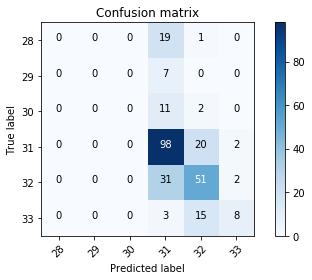

Accuracy:  0.4117647111415863


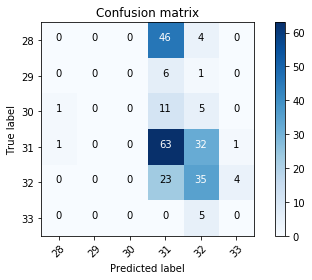

'\n28: 204, 11.276948590381426%\n29: 59, 3.26147042564953%\n30: 165, 9.12106135986733%\n31: 661, 36.53952459922609%\n32: 581, 32.117191818684354%\n33: 139, 7.683803206191266%\n    \n28: 47, 8.117443868739207%\n29: 18, 3.1088082901554404%\n30: 69, 11.917098445595855%\n31: 225, 38.860103626943%\n32: 191, 32.98791018998273%\n33: 29, 5.008635578583765%\n'

In [2]:
post.visualizeConfusion('results', '*rot*.pkl', ['validation', 'testing'])

'''
28: 204, 11.276948590381426%
29: 59, 3.26147042564953%
30: 165, 9.12106135986733%
31: 661, 36.53952459922609%
32: 581, 32.117191818684354%
33: 139, 7.683803206191266%
    
28: 47, 8.117443868739207%
29: 18, 3.1088082901554404%
30: 69, 11.917098445595855%
31: 225, 38.860103626943%
32: 191, 32.98791018998273%
33: 29, 5.008635578583765%
'''

In [20]:
import tensorflow as tf
from tensorflow import keras

model = tf.keras.models.load_model('bsp_r4_f15_11_11_11_20_18_18_18_25_22_22_22_30_28_28_35_50_90_k5_7_7_7_7_7_7_7_7_7_7_7_7_7_7_6_5_5_p1_1_1_1_3_1_1_1_3_1_1_1_3_1_1_1_1_1_pStrides1_1_1_1_2_1_1_1_2_1_1_1_2_1_1_1_1_1_d80_54_24_drop_0.10_sDrop_0.10_l2_0.00010_model')

JSONDecodeError: Expecting value: line 1 column 1 (char 0)